In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [77]:
diamonds = pd.read_csv('./M2-project/diamonds.csv')

In [36]:
ricks_diamonds = pd.read_csv('./M2-project/rick_diamonds.csv')

In [78]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [11]:
cut = diamonds['cut'].unique()
color = diamonds['color'].unique()
clarity = diamonds['clarity'].unique()

In [45]:
price_per_carat = diamonds.groupby(by=['cut','color','clarity'])['carat','price'].mean().reset_index()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [46]:
price_per_carat['price_per_carat'] = price_per_carat['price']/price_per_carat['carat']

In [47]:
price_per_carat[['cut','color','clarity','price_per_carat']]

,cut,color,clarity,price_per_carat
0,Fair,D,I1,3932.356858
1,Fair,D,IF,3952.238806
2,Fair,D,SI1,4749.960286
3,Fair,D,SI2,4225.468845
4,Fair,D,VS1,4636.825397
...,...,...,...,...
271,Very Good,J,SI2,4466.995628
272,Very Good,J,VS1,4486.322998
273,Very Good,J,VS2,4654.193145
274,Very Good,J,VVS1,4262.780269


In [49]:
ricks_diamonds_predict = ricks_diamonds.merge(right=price_per_carat[['cut','color','clarity','price_per_carat']],on=['color','cut','clarity'])

In [52]:
ricks_diamonds_predict['price'] = ricks_diamonds_predict['carat']*ricks_diamonds_predict['price_per_carat']

In [55]:
ricks_diamonds_predict = ricks_diamonds_predict.drop(columns='price_per_carat')

In [57]:
ricks_diamonds_predict.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4501.856733
1,1.50,Very Good,H,SI2,62.5,60.0,7.25,7.32,4.55,7420.642967
2,1.02,Very Good,H,SI2,63.5,58.0,6.34,6.38,4.04,5046.037218
3,2.20,Very Good,H,SI2,63.3,57.0,8.28,8.17,5.21,10883.609685
4,1.20,Very Good,H,SI2,62.1,59.0,6.75,6.80,4.21,5936.514374


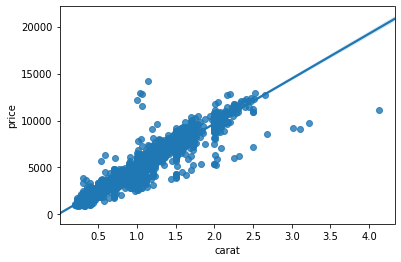

In [72]:
sns.regplot(ricks_diamonds_predict['carat'],ricks_diamonds_predict['price'])

In [59]:
ricks_diamonds_predict.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.039354,0.180932,0.974528,0.972677,0.969092,0.962096
depth,0.039354,1.000000,-0.282624,-0.019754,-0.023776,0.100685,-0.000930
table,0.180932,-0.282624,1.000000,0.195087,0.187889,0.153785,0.169261
x,0.974528,-0.019754,0.195087,1.000000,0.997887,0.985203,0.947083
y,0.972677,-0.023776,0.187889,0.997887,1.000000,0.985350,0.945850
z,0.969092,0.100685,0.153785,0.985203,0.985350,1.000000,0.937590
price,0.962096,-0.000930,0.169261,0.947083,0.945850,0.937590,1.000000


In [60]:
ricks_diamonds_predict.cov()

,carat,depth,table,x,y,z,price
carat,0.223669,0.027131,0.192019,0.516335,0.510775,0.318409,1.070373e+03
depth,0.027131,2.124864,-0.924487,-0.032260,-0.038482,0.101964,-3.188614e+00
table,0.192019,-0.924487,5.035621,0.490443,0.468150,0.239749,8.935048e+02
x,0.516335,-0.032260,0.490443,1.255072,1.241292,0.766793,2.495954e+03
y,0.510775,-0.038482,0.468150,1.241292,1.232866,0.760092,2.470554e+03
z,0.318409,0.101964,0.239749,0.766793,0.760092,0.482654,1.532305e+03
price,1070.373445,-3.188614,893.504761,2495.953549,2470.553758,1532.304624,5.533864e+06


In [73]:
y=ricks_diamonds_predict['price']
X=ricks_diamonds_predict[['carat','depth','table','x','y','z']]

In [74]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print ('The slope is: ' , str(model.coef_))
print ('The intercept is: ' , str(model.intercept_))

The slope is:  [4046.78609033  -63.30417864  -18.66621742  135.08557041  117.0062953
  128.83419356]
The intercept is:  3769.6832535886756


In [76]:
model.predict(X)

array([4423.08517442, 7185.4302266 , 4918.38193406, ..., 4826.34322804,
       5238.54878897, 3566.55139524])

In [67]:
model.score(X,y)

0.9286000898852177

In [68]:
model = sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
r2_score(y, predictions)

0.928180283386533

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          4.302e+04
Date:                Wed, 15 Apr 2020   Prob (F-statistic):                        0.00
Time:                        10:58:02   Log-Likelihood:                         -39326.
No. Observations:                5000   AIC:                                  7.866e+04
Df Residuals:                    4994   BIC:                                  7.870e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       3892.7666     82.667     47.090      0.000    3730.702    4054.831
depth        -17.2703      3.634     -4.753      0.000     -24.394     -10.147
table         -6.6841      3.646     -1.833      0.067     -13.831       0.463
x            186.9721    129.427      1.445      0.149     -66.761     440.705
y            336.3617    126.560      2.658      0.008      88.248     584.475
z           -208.5929     93.095     -2.241      0.025    -391.100     -26.086
==============================================================================
Omnibus:                     1644.149   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           201627.386
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                      34.093   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predict com valores reais. 

In [ ]:
y=ricks_diamonds_predict['price']
X=ricks_diamonds_predict[['carat','depth','table','x','y','z']]

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.predict(X)

In [84]:
diamonds[(diamonds['cut']=='Premium')&(diamonds['color']=='E')&(diamonds['clarity']=='SI1')]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
94,0.75,Premium,E,SI1,59.9,54.0,2760,6.00,5.96,3.58
182,0.70,Premium,E,SI1,60.0,59.0,2777,5.79,5.75,3.46
183,0.70,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
184,0.70,Premium,E,SI1,62.7,59.0,2777,5.67,5.63,3.54
...,...,...,...,...,...,...,...,...,...,...
48865,0.71,Premium,E,SI1,62.2,58.0,2743,5.74,5.67,3.55
48908,0.70,Premium,E,SI1,61.3,58.0,2753,5.68,5.71,3.49
48909,0.70,Premium,E,SI1,60.0,59.0,2753,5.75,5.79,3.46
48914,0.70,Premium,E,SI1,60.5,58.0,2753,5.74,5.77,3.48


In [70]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error()

In [ ]:
r2
root mean sqart
regressao linear

In [86]:
ricks_diamonds_predict

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4501.856733
1,1.50,Very Good,H,SI2,62.5,60.0,7.25,7.32,4.55,7420.642967
2,1.02,Very Good,H,SI2,63.5,58.0,6.34,6.38,4.04,5046.037218
3,2.20,Very Good,H,SI2,63.3,57.0,8.28,8.17,5.21,10883.609685
4,1.20,Very Good,H,SI2,62.1,59.0,6.75,6.80,4.21,5936.514374
...,...,...,...,...,...,...,...,...,...,...
4995,0.71,Fair,J,VS2,64.4,56.0,5.64,5.60,3.62,2862.310654
4996,2.01,Very Good,H,I1,58.1,63.0,8.30,8.19,4.79,6367.328475
4997,1.00,Good,D,IF,63.3,59.0,6.33,6.37,4.02,12227.796053
4998,1.03,Good,J,I1,58.2,64.0,6.64,6.69,3.88,2999.267416


In [ ]:
y=diamonds['price']
y_pred = diamond['Meu preço']

In [85]:
diamonds['']

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
